## iris 데이터를 로드하고 DecisionTree 모델로 시각화 해보기

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_dataset.target, test_size=0.2)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


 Model [basic_tree] Train set 정확도 : 1.00
 Model [basic_tree] Test set 정확도 : 0.80


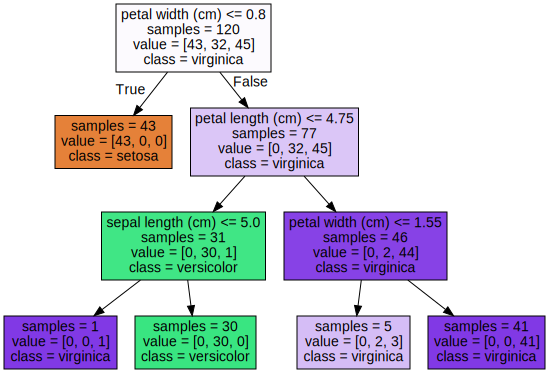

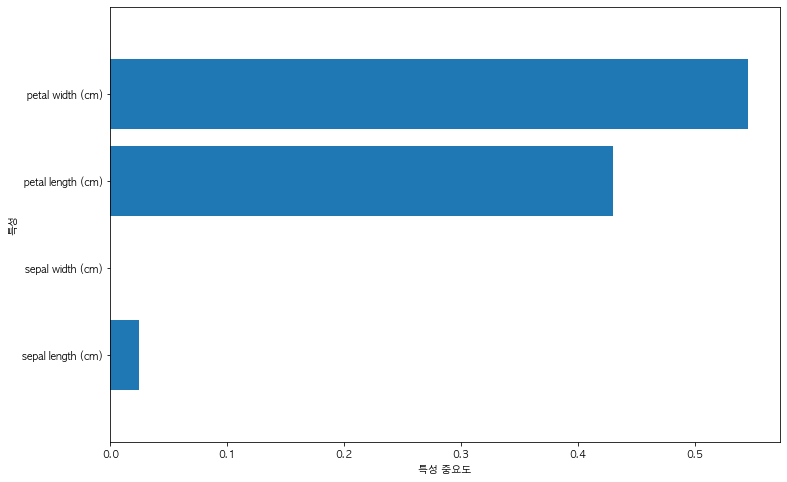

 Model [maxdepth_3_tree] Train set 정확도 : 0.98
 Model [maxdepth_3_tree] Test set 정확도 : 0.77


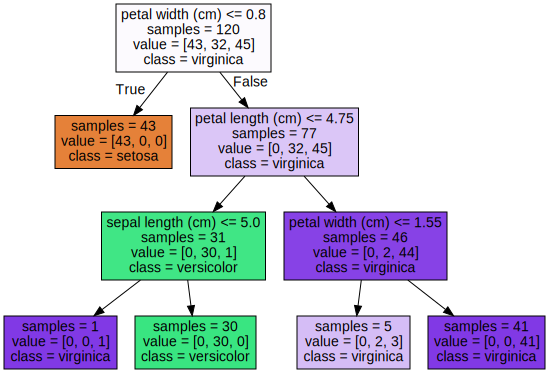

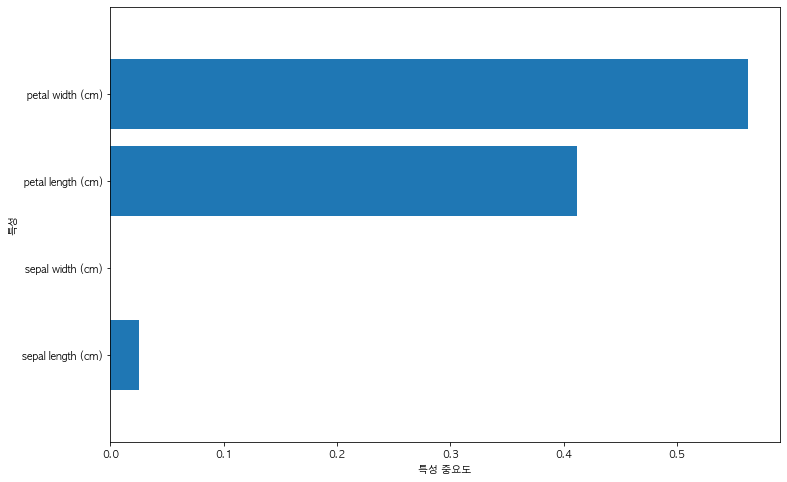

In [20]:
from sklearn.tree import export_graphviz
import graphviz

trees = {'basic_tree':DecisionTreeClassifier(), 'maxdepth_3_tree':DecisionTreeClassifier(max_depth=3)}

for model_name, tree in trees.items():
    # model = tree
    tree.fit(X_train, y_train)
    print(f' Model [{model_name}] Train set 정확도 : {tree.score(X_train, y_train):.2f}') 
    print(f' Model [{model_name}] Test set 정확도 : {tree.score(X_test, y_test):.2f}')
    export_graphviz(model, out_file=f"{model_name}.dot", class_names=["setosa", "versicolor", "virginica"],
                feature_names=iris_dataset.feature_names, impurity=False, filled=True)
    with open(f"{model_name}.dot", 'r', encoding='utf-8') as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
    
    n_features = iris_dataset.data.shape[1] # feature
    plt.figure(figsize=(12,8))
    plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), tree.feature_names_in_)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.show()

basic_tree의 max_depth가 None 일 때 Train set 정확도 : 1.0
basic_tree의 max_depth가 None 일 때 Test set 정확도 : 0.8


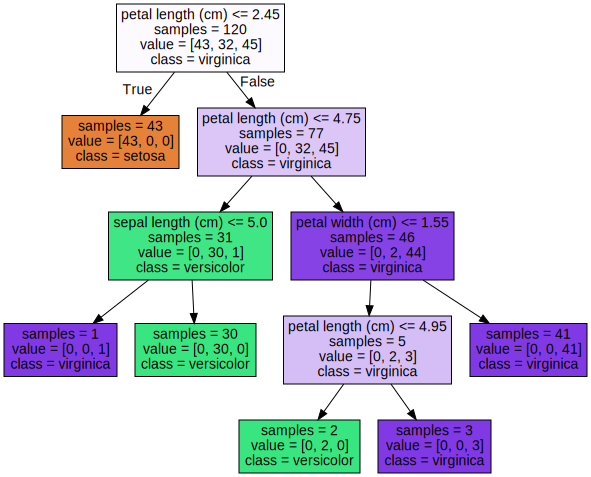

maxdepth_3_tree의 max_depth가 3 일 때 Train set 정확도 : 0.9833333333333333
maxdepth_3_tree의 max_depth가 3 일 때 Test set 정확도 : 0.8666666666666667


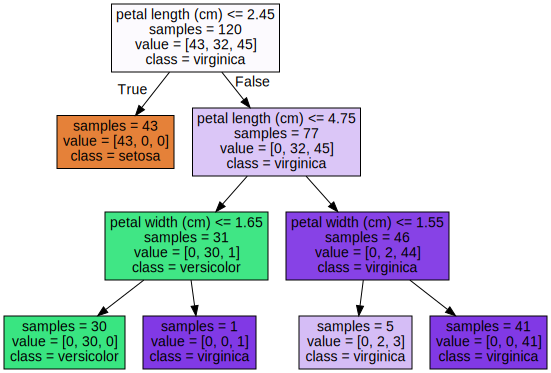

In [21]:
global trees
trees = ['basic_tree', 'maxdepth_3_tree']

for max_depth, tree in zip([None, 3], trees):
    globals()[tree] = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    globals()[tree].fit(X_train, y_train)
    print(f'{tree}의 max_depth가 {max_depth} 일 때 Train set 정확도 : {globals()[tree].score(X_train, y_train)}') 
    print(f'{tree}의 max_depth가 {max_depth} 일 때 Test set 정확도 : {globals()[tree].score(X_test, y_test)}')
    export_graphviz(globals()[tree], out_file=f"{tree}.dot", class_names=["setosa", "versicolor", "virginica"],
                feature_names=iris_dataset.feature_names, impurity=False, filled=True)
    with open(f"{tree}.dot", 'r', encoding='utf-8') as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

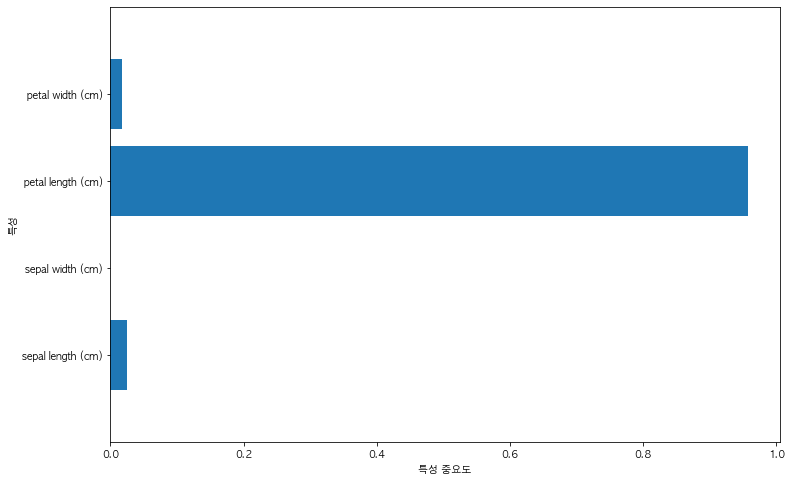

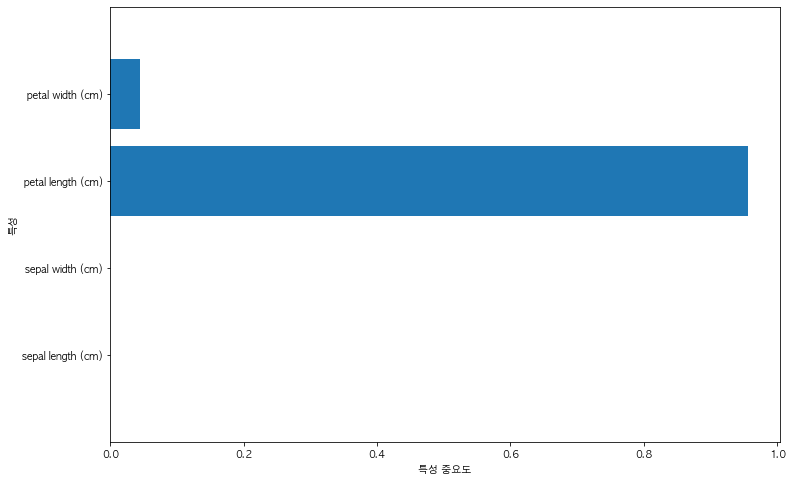

In [24]:
for x in trees:
    n_features = iris_dataset.data.shape[1] # feature
    plt.figure(figsize=(12,8))
    plt.barh(np.arange(n_features), globals()[x].feature_importances_, align='center')
    plt.yticks(np.arange(n_features), globals()[x].feature_names_in_)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.show()